<a href="https://colab.research.google.com/github/greatisoutofcntrl/Zidio-Heart-Disease-Data-training-project/blob/main/Heart_disease_data_training(Zidio_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
!pip install pandas

In [146]:
!pip install scikit-learn

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [13]:
heart_data = pd.read_csv('/content/Heart_data.csv')

In [14]:
#print first 5 rows of dataset

In [15]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
#numbers of rows and columns in dataset

In [17]:
heart_data.shape

(1592, 14)

In [18]:
#getting some info about the dataset

In [19]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB


In [20]:
#checking missing values

In [21]:
heart_data.isnull().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [22]:
#Handling missing values

In [23]:
#Analyse distribution of data in Age

<ipython-input-24-c2b0c723b759>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.age)


<Axes: xlabel='age', ylabel='Density'>

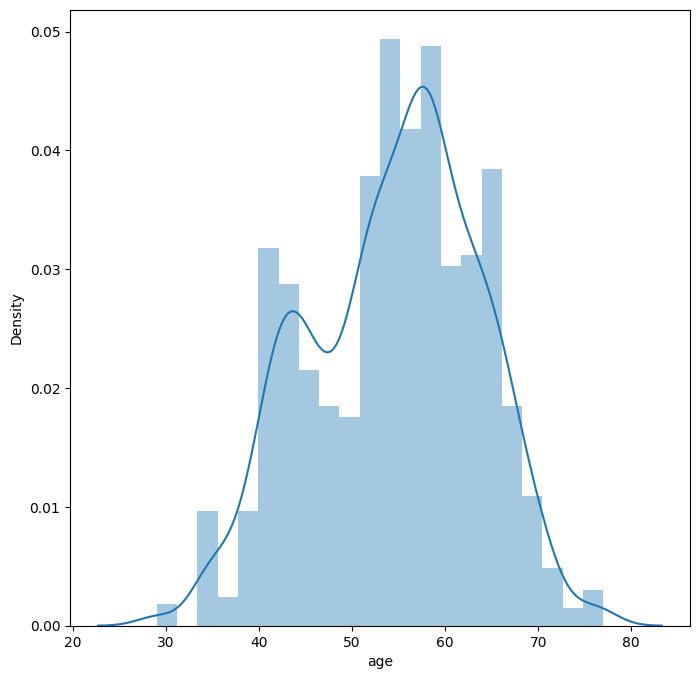

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.age)

In [25]:
#Replace the missing values with mean value

In [26]:
heart_data['age'].fillna(heart_data['age'].mean(),inplace=True)

In [27]:
heart_data['age'].isnull().sum()

0

In [28]:
##Analyse distribution of data in Sex

In [29]:
#first check for null values


In [30]:
heart_data['sex'].isnull().sum()

31

In [31]:
#Replace the missing values with mode value

In [35]:
heart_data['sex'].fillna(heart_data['sex'].mode(),inplace=True)

In [36]:
heart_data['sex'].isnull().sum()

0

In [37]:
#Analyse distribution of data in Chest pain

In [38]:
heart_data['cp'].isnull().sum()

159

<ipython-input-39-793796581802>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data.cp)


<Axes: xlabel='cp', ylabel='Density'>

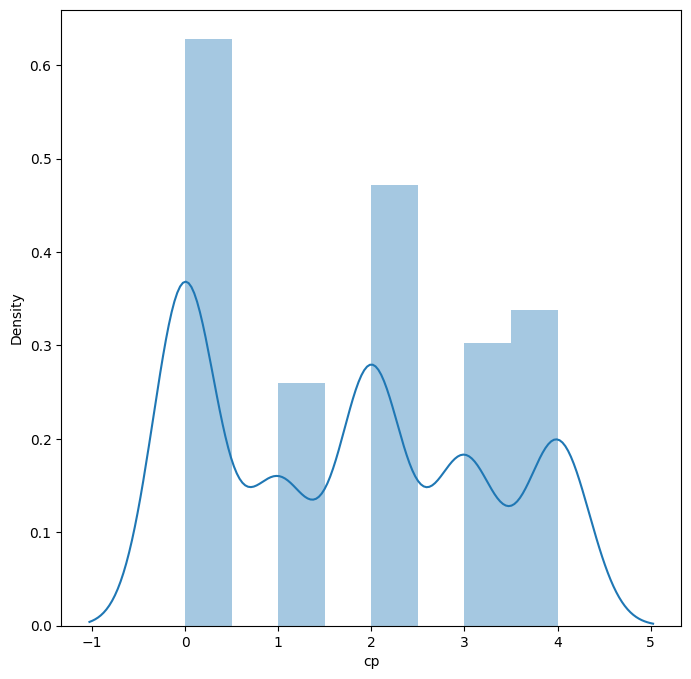

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(heart_data.cp)

In [40]:
heart_data['cp'].fillna(heart_data['cp'].median(),inplace=True)

In [41]:
heart_data['cp'].isnull().sum()

0

In [42]:
#Analyse distribution of data in Blood Pressure( trestbps )


In [43]:
heart_data['trestbps'].isnull().sum()

0

In [44]:
#Replace the missing values in Cholesterol with mean value

In [45]:
heart_data['chol'].fillna(heart_data['chol'].mean(),inplace=True)

In [46]:
heart_data['chol'].isnull().sum()

0

In [47]:
#Replace the missing values in Fasting blood sugar (Fbs) with mean value


In [48]:
heart_data['fbs'].fillna(heart_data['fbs'].mean(),inplace=True)

In [49]:
heart_data['fbs'].isnull().sum()

0

In [50]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [51]:
#Replace the missing values in Resting Electrocardiographic result (restecg) with mode value


In [52]:
heart_data['restecg'].fillna(heart_data['restecg'].median(),inplace=True)

In [53]:
heart_data['restecg'].isnull().sum()

0

In [54]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [55]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1587,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
1588,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
1589,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
1590,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1
1591,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


In [56]:

#Replace the missing values in Exercise indused anigna (exang) with median value

In [57]:
heart_data['exang'].fillna(heart_data['exang'].median(),inplace=True)

In [58]:
heart_data['exang'].isnull().sum()

0

In [59]:
#Replace the missing values in Oldpeak (oldpeak) with mean value

In [60]:
heart_data['oldpeak'].fillna(heart_data['oldpeak'].mean(),inplace=True)

In [61]:
heart_data['oldpeak'].isnull().sum()

0

In [62]:
#Replace the missing values in Slope(slope) with mean value

In [63]:
heart_data['slope'].fillna(heart_data['slope'].median(),inplace=True)

In [64]:
heart_data['slope'].isnull().sum()

0

In [65]:
#Replace the missing values in Defect type(thal) with median value

In [66]:
heart_data['thal'].fillna(heart_data['thal'].median(),inplace=True)

In [67]:
heart_data['thal'].isnull().sum()

0

In [68]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
#Replaced all Null values

In [70]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.300000,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.066496,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.600000,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,1.0,187.0,0.0,3.500000,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.400000,1.0,0.0,3.0,0


In [71]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1592 non-null   float64
 1   sex       1592 non-null   float64
 2   cp        1592 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1592 non-null   float64
 5   fbs       1592 non-null   float64
 6   restecg   1592 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1592 non-null   float64
 9   oldpeak   1592 non-null   float64
 10  slope     1592 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1592 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB


In [72]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,54.427627,0.688020,1.758166,131.581658,246.507521,0.147389,0.701005,149.300251,0.324121,1.066496,1.440327,0.725503,3.172739,0.751884
std,8.848552,0.458913,1.390887,17.610804,50.290721,0.345695,0.762772,23.007862,0.468192,1.160040,0.618351,1.000014,1.695095,0.782024
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


In [73]:
# Checking the distribution on Target Variable

In [74]:
heart_data['target'].value_counts()

1    730
0    659
2    155
3     35
4     13
Name: target, dtype: int64

In [172]:
# 1 = Defective heart
# 0 = Non Defective heart


Splitting the Features and Target

In [75]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang   oldpeak  \
0     63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0  2.300000   
1     67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0  1.066496   
2     67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0  2.600000   
3     37.0  1.0  3.0     130.0  250.0  0.0      1.0    187.0    0.0  3.500000   
4     41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0  1.400000   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...       ...   
1587  52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0  0.500000   
1588  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0  0.000000   
1589  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0  1.300000   
1590  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0  0.400000   
1591  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0  1.500000   

      slope   ca  thal  
0 

In [76]:
print(Y)

0       0
1       2
2       1
3       0
4       0
       ..
1587    1
1588    1
1589    1
1590    1
1591    2
Name: target, Length: 1592, dtype: int64


In [77]:
#Spliting data into training data and test data

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [79]:
print(X.shape, X_train.shape,X_test.shape)

(1592, 13) (1273, 13) (319, 13)


Model Training

Logistic Regression

In [82]:
model = LogisticRegression()


In [83]:
#training Logistic model with training data

In [84]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
#Model Evaluation
#Accuracy Score on training data


In [90]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [88]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.6818538884524745


In [89]:
#Accuracy Score on training data

In [91]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [92]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.6833855799373041


Feature Scaling

In [93]:
#split data into feature data and target data

In [94]:
X = heart_data.iloc[:, :-1].values
Y = heart_data.iloc[:, -1].values

In [95]:
#Split the data again into 75% training data and 25% testing data set

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state= 1)

In [97]:
#scale the values in the data to be values between 0 and 1 inclusive

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
#Using Random Forest Classifier



Using RandomForestClassifier Model

In [101]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [102]:
#Testing models for accuracy on training data set
model = forest
model.score(X_train, Y_train)

0.9321608040201005

In [103]:
#Testing models for accuracy on test data set
model = forest
model.score(X_test, Y_test)

0.6984924623115578

In [104]:
#Testing the models accuracy on test data set usung confusion matrix

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

#print confusuion matrix
print(cm)

#print model accuracy on the test data
print('Model Test Accuracy ={}'. format( (TP + TN)/ (TP + TN + FN + FP) ))

[[131  40   3   0   0]
 [ 35 130  12   0   0]
 [  2  11  17   6   2]
 [  0   2   5   0   0]
 [  0   0   2   0   0]]
Model Test Accuracy =0.7767857142857143


Using KNeighbours Classifier Model


In [115]:
from sklearn.neighbors import KNeighborsClassifier



In [116]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [117]:
Y_pred3=knn.predict(X_test)
accuracy_score(Y_test,Y_pred3)

0.7110552763819096

In [119]:
# Train KNeigbours futher for more accuracy
score = []
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  Y_pred=knn.predict(X_test)
  score.append(accuracy_score(Y_test, Y_pred))

In [121]:
score

[0.6834170854271356,
 0.7185929648241206,
 0.6984924623115578,
 0.7060301507537688,
 0.7110552763819096,
 0.7160804020100503,
 0.6859296482412061,
 0.678391959798995,
 0.6909547738693468,
 0.6984924623115578,
 0.6884422110552764,
 0.6934673366834171,
 0.6959798994974874,
 0.6834170854271356,
 0.7035175879396985,
 0.7035175879396985,
 0.7110552763819096,
 0.7010050251256281,
 0.6984924623115578,
 0.6934673366834171,
 0.7010050251256281,
 0.7035175879396985,
 0.7010050251256281,
 0.6959798994974874,
 0.7035175879396985,
 0.6934673366834171,
 0.6959798994974874,
 0.7060301507537688,
 0.6959798994974874,
 0.6984924623115578,
 0.7085427135678392,
 0.7135678391959799,
 0.7185929648241206,
 0.7060301507537688,
 0.7110552763819096,
 0.7135678391959799,
 0.7085427135678392,
 0.6984924623115578,
 0.7010050251256281]

In [127]:
score = []
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=2)
  knn.fit(X_train, Y_train)
  Y_pred=knn.predict(X_test)
accuracy_score(Y_test, Y_pred)


0.7185929648241206

Non Linear Algorithms

In [133]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.300000,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.066496,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.600000,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,1.0,187.0,0.0,3.500000,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.400000,1.0,0.0,3.0,0


In [134]:
heart_data = heart_data.drop_duplicates()

In [135]:
heart_data.shape

(1090, 14)

In [136]:
#Training the model
X = heart_data.drop('target',axis=1)
Y = heart_data['target']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)


DecisionTreeClassifier()

In [138]:
Y_pred4= dt.predict(X_test)
accuracy_score(Y_test,Y_pred4)

0.5

Gradient Boosting Classifier

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
GradientBoostingClassifier()

GradientBoostingClassifier()

In [154]:
Y_pred6 =gbc.predict(X_test)
accuracy_score(Y_test,Y_pred6)

0.5321100917431193

RANDOM FOREST CLASSIFIER IS THE BEST MODEL IN TRAINING THIS DATASET GIVING AN ACCURACY OF 93%

---------------------------------------------------------------------------


BUILDING A PREDICTIVE SYSTEM

In [163]:
#Predicting A patient with Heart disease



In [169]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,0,2,0)

#Change input data to numpy array


In [177]:
input_data_as_numpy_array = np.asarray(input_data)
#Reshaping the numpy array as we predicting for only one instance

In [190]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

prediction = model.predict(input_data_reshaped)
if (prediction[0]== 0):
  print( 'NON DEFECTIVE HEART' )
else:
  print( 'DEFECTIVE HEART' )


[0]
NON DEFECTIVE HEART
